In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # pip install statsmodels
import numpy as np

# Task 4 : Stationarity, ACF and PACF of ARMA models

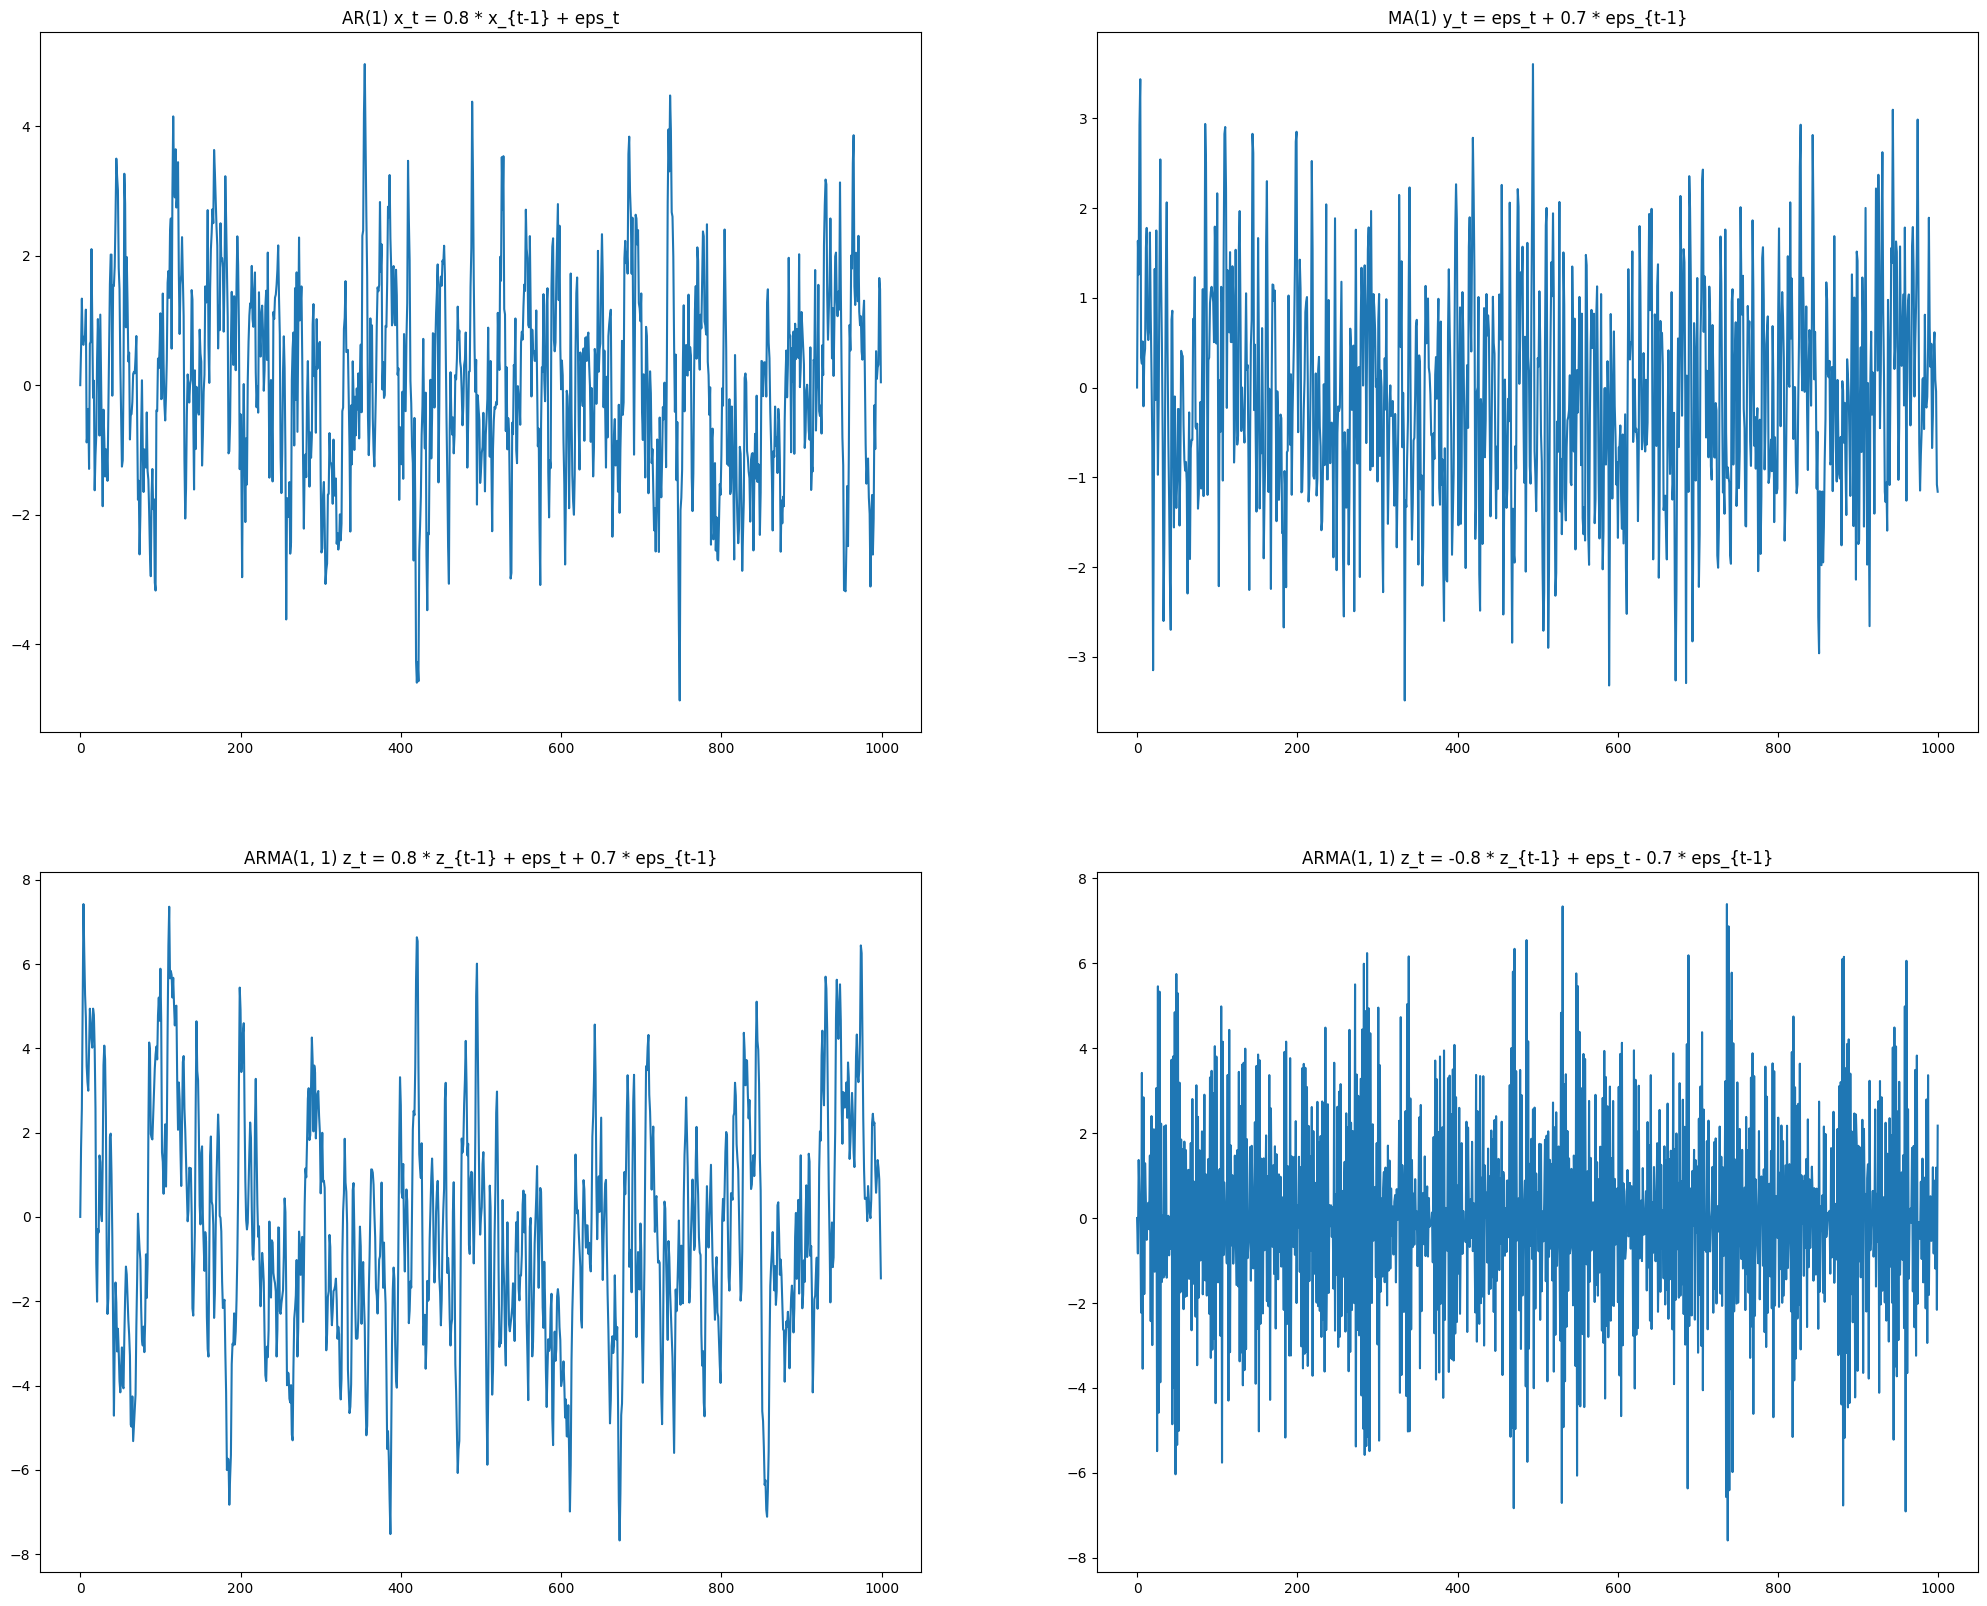

In [3]:
def draw_line_plots(all_series_titles):
    """
    all_series_titles; [(series1, title1), (series2, title2), ...]
    plot in 2 columns
    """
    n = len(all_series_titles)
    n_rows = n // 2 + n % 2
    fig, axs = plt.subplots(n_rows, 2, figsize=(25, 10 * n_rows))
    for i, (series, title) in enumerate(all_series_titles):
        ax = axs[i // 2, i % 2]
        series.plot(ax=ax)
        ax.set_title(title)

# Series 1: AR(1) x_t = 0.8 * x_{t-1} + eps_t
# Series 2: MA(1) y_t = eps_t + 0.7 * eps_{t-1}
# Series 3: ARMA(1, 1) z_t = 0.8 * z_{t-1} + eps_t + 0.7 * eps_{t-1}
# Series 4: ARMA(1, 1) z_t = -0.8 * z_{t-1} + eps_t - 0.7 * eps_{t-1}


np.random.seed(0)
noise = np.random.normal(0, 1, 1000)

series1 = [0]
for i in range(1, 1000):
    series1.append(0.8 * series1[i-1] + np.random.normal(0, 1))
series1 = pd.Series(series1)

series2 = [0]
for i in range(1, 1000):
    series2.append(noise[i] + 0.7 * noise[i-1])
series2 = pd.Series(series2)


series3 = [0]
for i in range(1, 1000):
    series3.append(0.8 * series3[i-1] + noise[i] + 0.7 * noise[i-1])
series3 = pd.Series(series3)

series4 = [0]
for i in range(1, 1000):
    series4.append(-0.8 * series4[i-1] + noise[i] - 0.7 * noise[i-1])
series4 = pd.Series(series4)

draw_line_plots([(series1, "AR(1) x_t = 0.8 * x_{t-1} + eps_t"), (series2, "MA(1) y_t = eps_t + 0.7 * eps_{t-1}"), (series3, "ARMA(1, 1) z_t = 0.8 * z_{t-1} + eps_t + 0.7 * eps_{t-1}"), (series4, "ARMA(1, 1) z_t = -0.8 * z_{t-1} + eps_t - 0.7 * eps_{t-1}")])

 

In [5]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=""):
    result = adfuller(series, autolag='AIC') # AIC is the Akaike Information Criterion, it is used to determine the lag value
    print(f"ADF Test: {title} p-value: {result[1]}")
    
adf_test(series1, "AR(1)")
adf_test(series2, "MA(1)")
adf_test(series3, "ARMA(1, 1)")
adf_test(series4, "ARMA(1, 1)")

ADF Test: AR(1) p-value: 1.509720236924587e-20
ADF Test: MA(1) p-value: 2.235695728185697e-15
ADF Test: ARMA(1, 1) p-value: 2.1361323655308316e-07
ADF Test: ARMA(1, 1) p-value: 0.0


In [7]:

arparams1 = np.r_[1, -np.array([0.8])]
maparam2 = np.r_[1, np.array([0.7])]

arparams3 = np.r_[1, -np.array([0.8])]
maparams3 = np.r_[1, np.array([0.7])]

arparams4 = np.r_[1, -np.array([-0.8])]
maparams4 = np.r_[1, np.array([-0.7])]

arma_process1 = sm.tsa.ArmaProcess(ar=arparams1)
arma_process2 = sm.tsa.ArmaProcess(ma=maparam2)
arma_process3 = sm.tsa.ArmaProcess(ar=arparams3, ma=maparams3)
arma_process4 = sm.tsa.ArmaProcess(ar=arparams4, ma=maparams4)

print("1. ARMA(1, 0) is stationary: \'", arma_process1.isstationary, "\' and is invertible: ", arma_process1.isinvertible)
print("2. ARMA(0, 1) is stationary: \'", arma_process2.isstationary, "\' and is invertible: ", arma_process2.isinvertible)
print("3. ARMA(1, 1) is stationary: \'", arma_process3.isstationary, "\' and is invertible: ", arma_process3.isinvertible)
print("4. ARMA(1, 1) is stationary: \'", arma_process4.isstationary, "\' and is invertible: ", arma_process4.isinvertible)


1. ARMA(1, 0) is stationary: ' True ' and is invertible:  True
2. ARMA(0, 1) is stationary: ' True ' and is invertible:  True
3. ARMA(1, 1) is stationary: ' True ' and is invertible:  True
4. ARMA(1, 1) is stationary: ' True ' and is invertible:  True


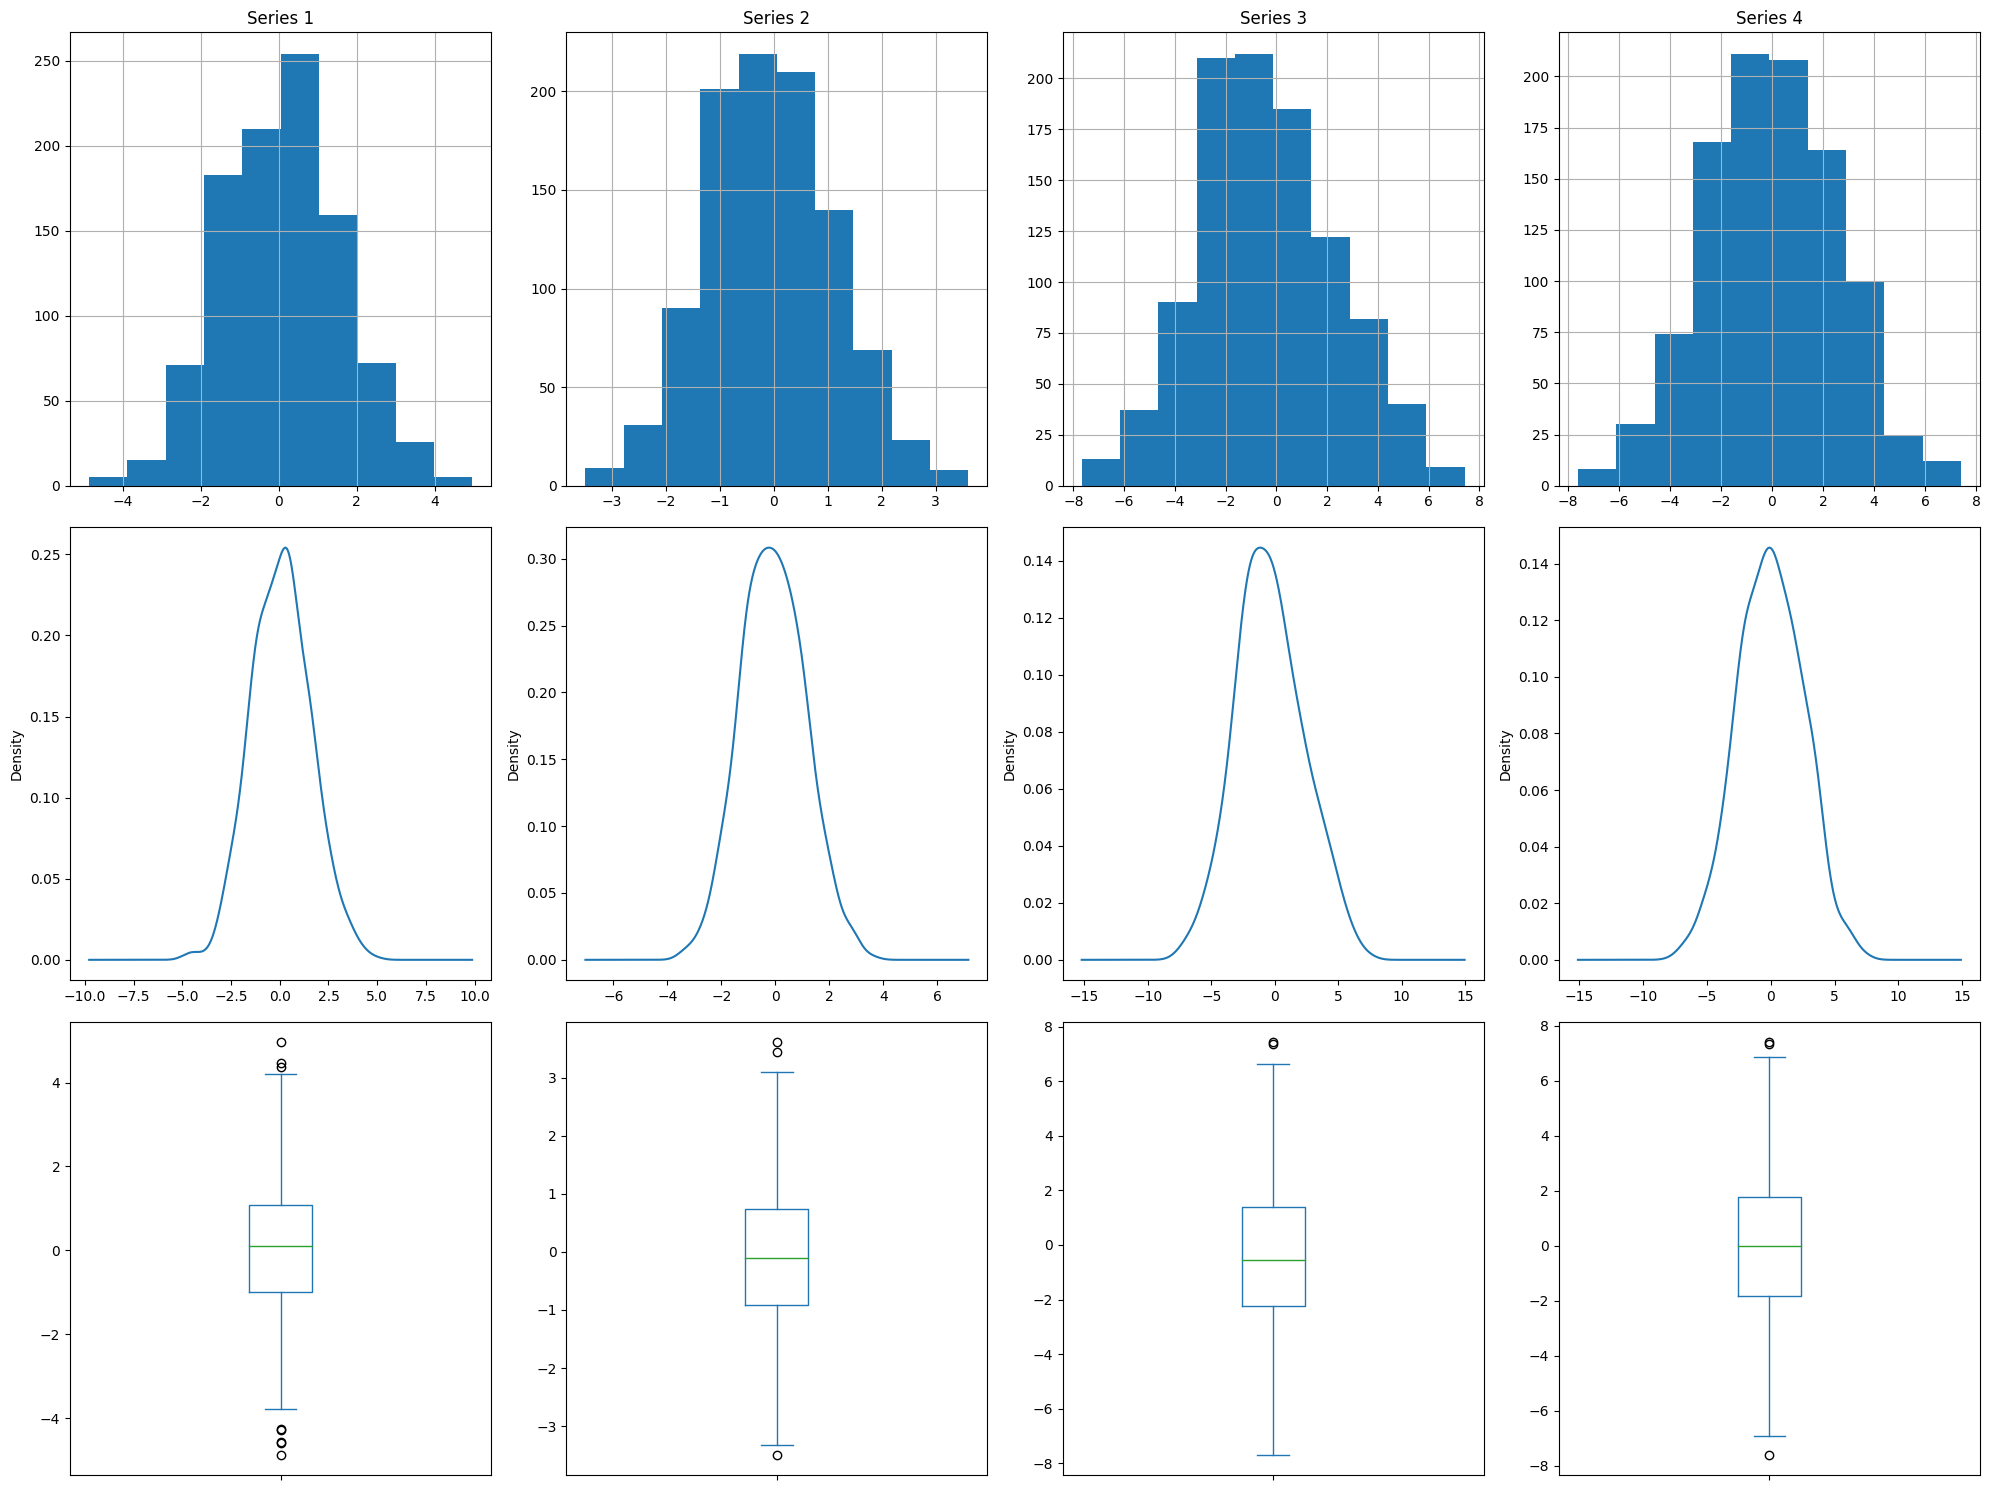

In [8]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
series = [series1, series2, series3, series4]
titles = ['Series 1', 'Series 2', 'Series 3', 'Series 4']  # Add the titles for each column

for i in range(4):
    axs[0, i].set_title(titles[i])  # Set the title for the top subplot in each column
    series[i].hist(ax=axs[0, i])
    series[i].plot(kind='kde', ax=axs[1, i])
    series[i].plot(kind='box', ax=axs[2, i])

plt.tight_layout()
plt.show()

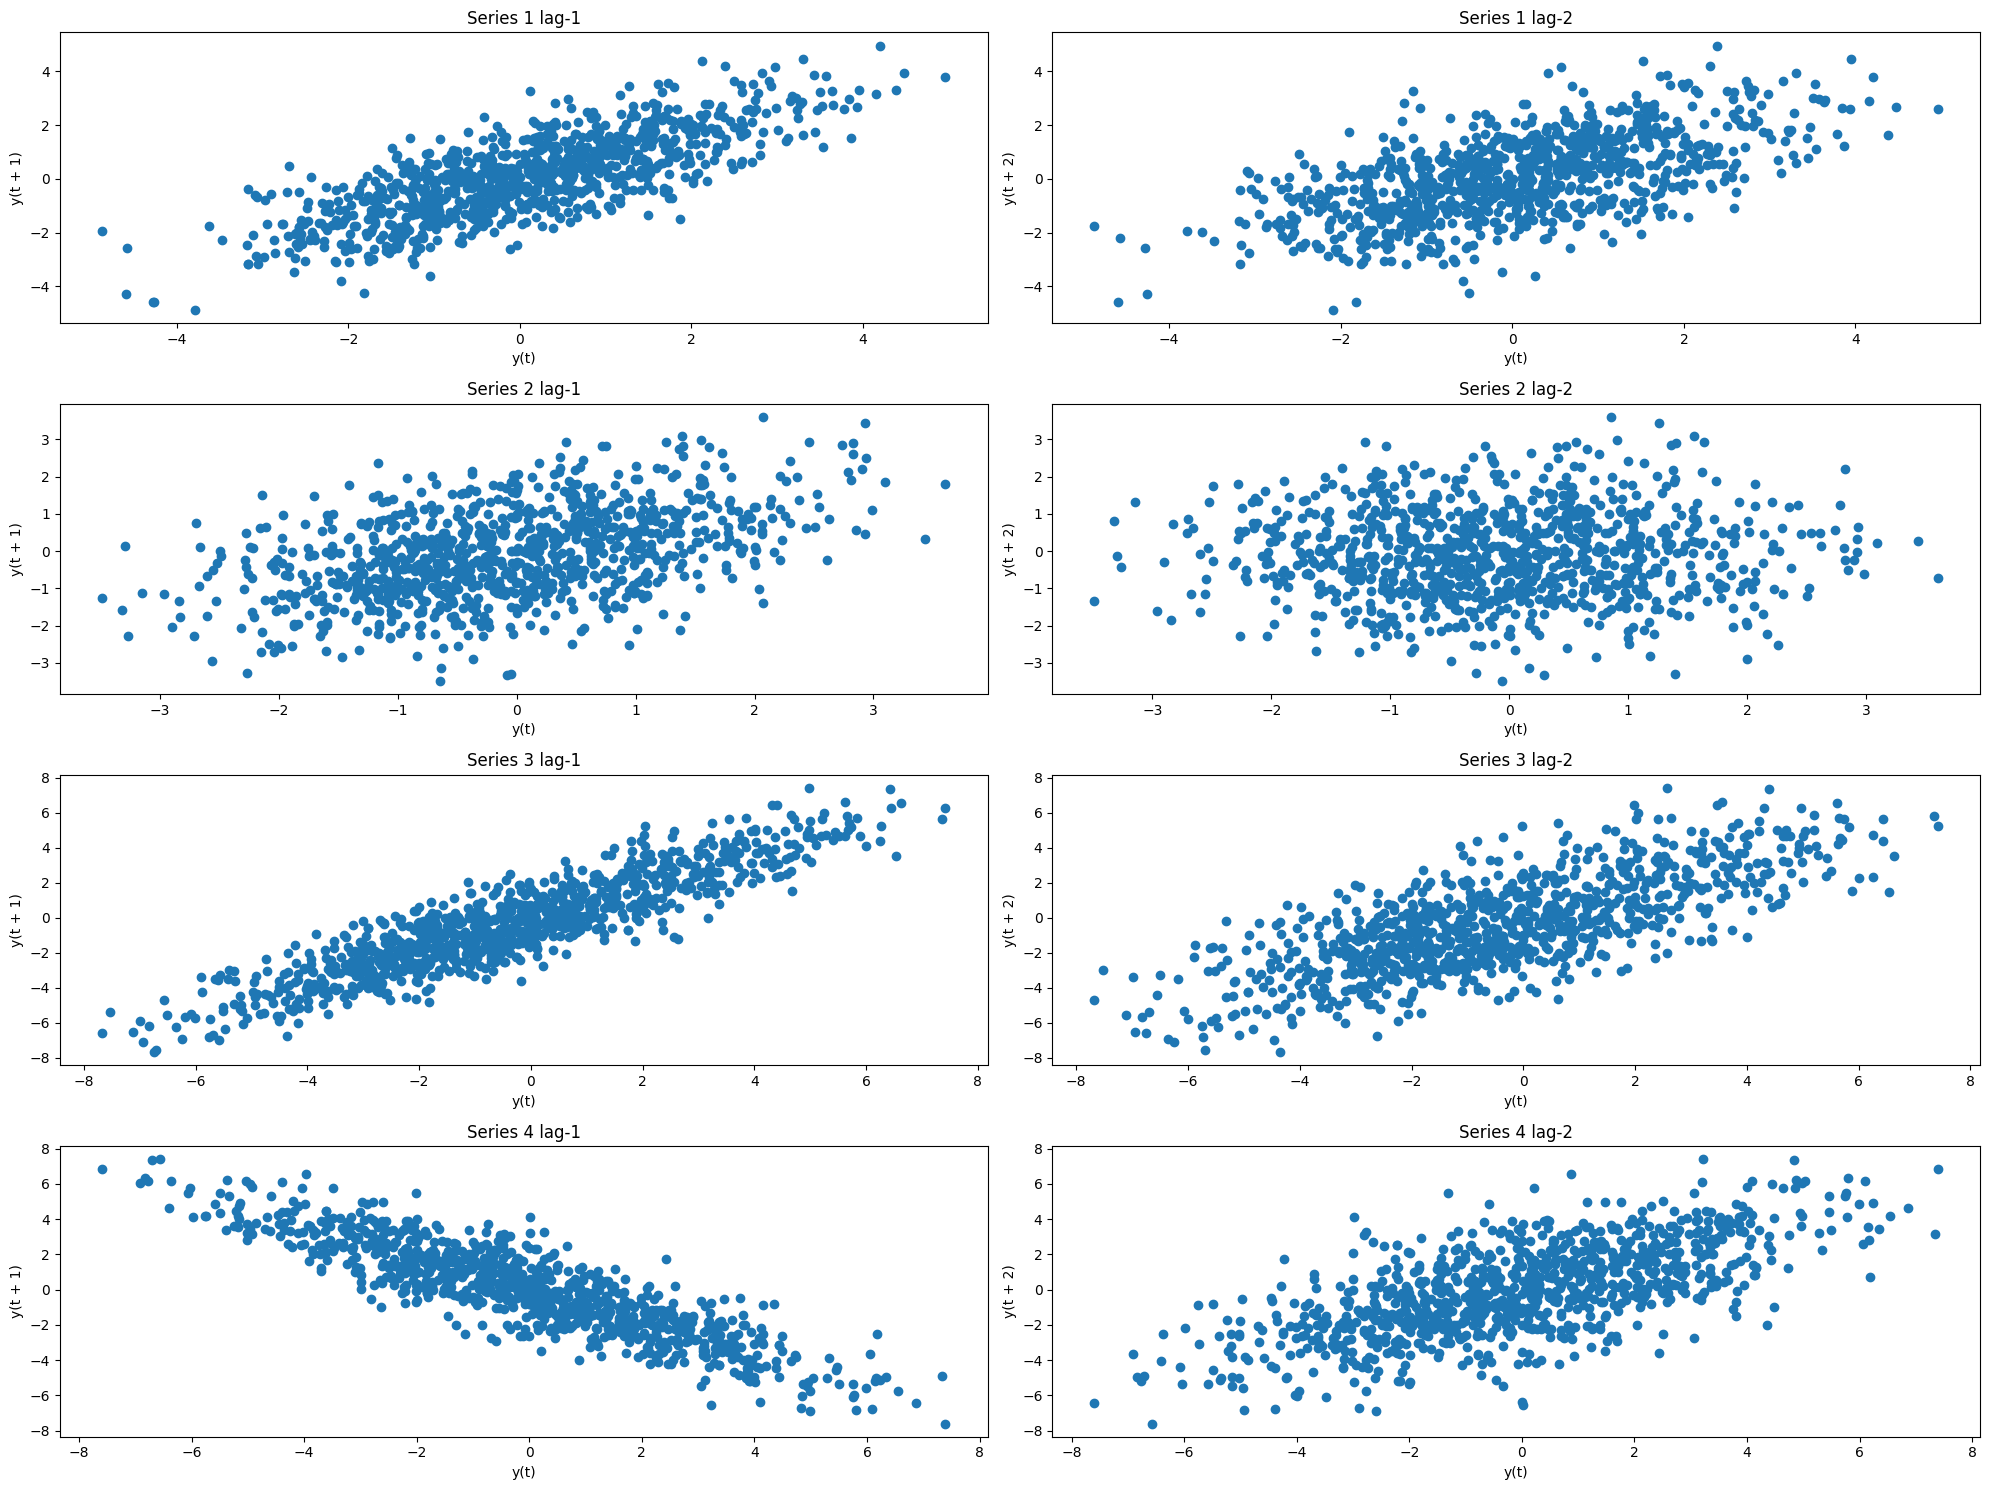

In [9]:
# draw lag-1 and lag-2 plots
fig, axs = plt.subplots(4, 2, figsize=(20, 15))
for i in range(4):
    pd.plotting.lag_plot(series[i], lag=1, ax=axs[i, 0])
    pd.plotting.lag_plot(series[i], lag=2, ax=axs[i, 1])
    axs[i, 0].set_title(titles[i] + ' lag-1')
    axs[i, 1].set_title(titles[i] + ' lag-2')
plt.tight_layout()
plt.show()

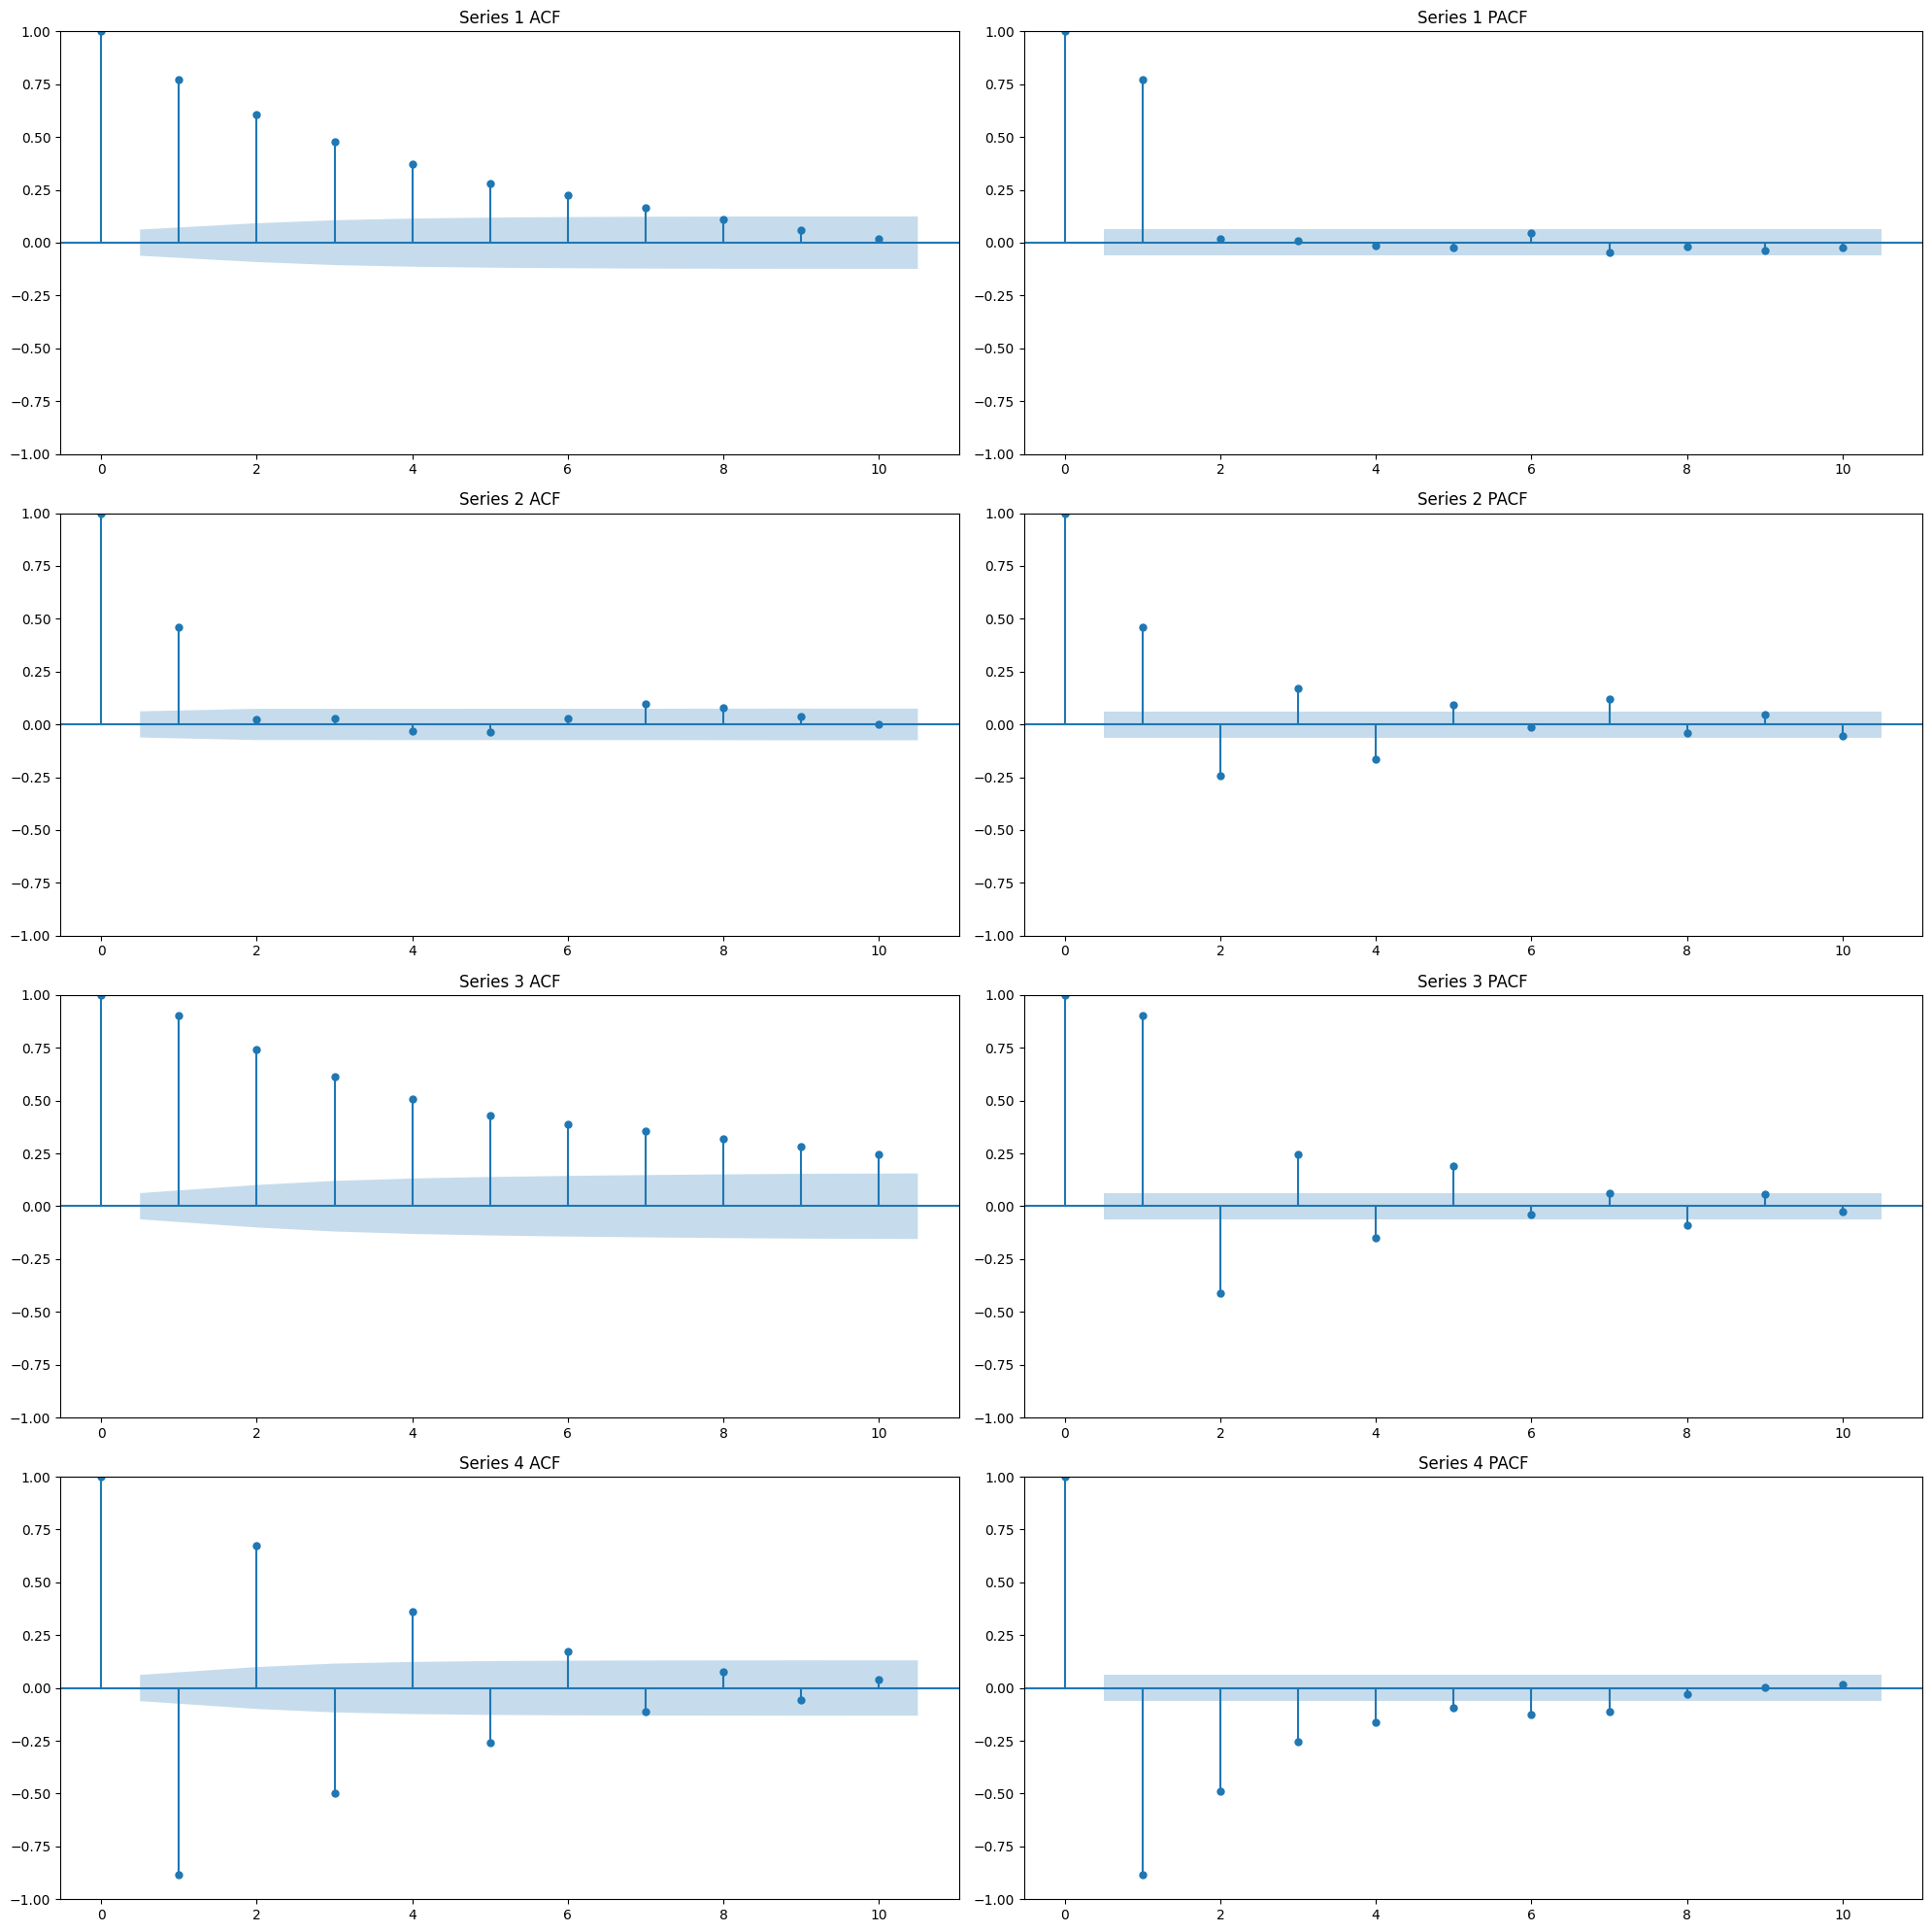

In [10]:
# Draw ACF and PACF plots for each series
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
for i in range(4):
    sm.graphics.tsa.plot_acf(series[i], lags=10, ax=axs[i, 0])
    sm.graphics.tsa.plot_pacf(series[i], lags=10, ax=axs[i, 1])
    axs[i, 0].set_title(titles[i] + ' ACF')
    axs[i, 1].set_title(titles[i] + ' PACF')
    
plt.tight_layout()
plt.show()